In [1]:
import numpy as np
import matplotlib.pyplot as plt
import vice

from utils import twoinfall_onezone
from multizone.src import outflows, models
from _globals import END_TIME, ONEZONE_DEFAULTS
from track_and_mdf import setup_axes, plot_vice_onezone
import paths

ETA_YZ1 = 0.2
ETA_YZ2 = 1.4
RADIUS = 8.
ZONE_WIDTH = 2.
DT = ONEZONE_DEFAULTS['dt']
SIMTIME = np.arange(0, END_TIME + DT, DT)
AREA = np.pi * ((RADIUS + ZONE_WIDTH/2)**2 - (RADIUS - ZONE_WIDTH/2)**2)
plt.style.use(paths.styles / 'paper.mplstyle')

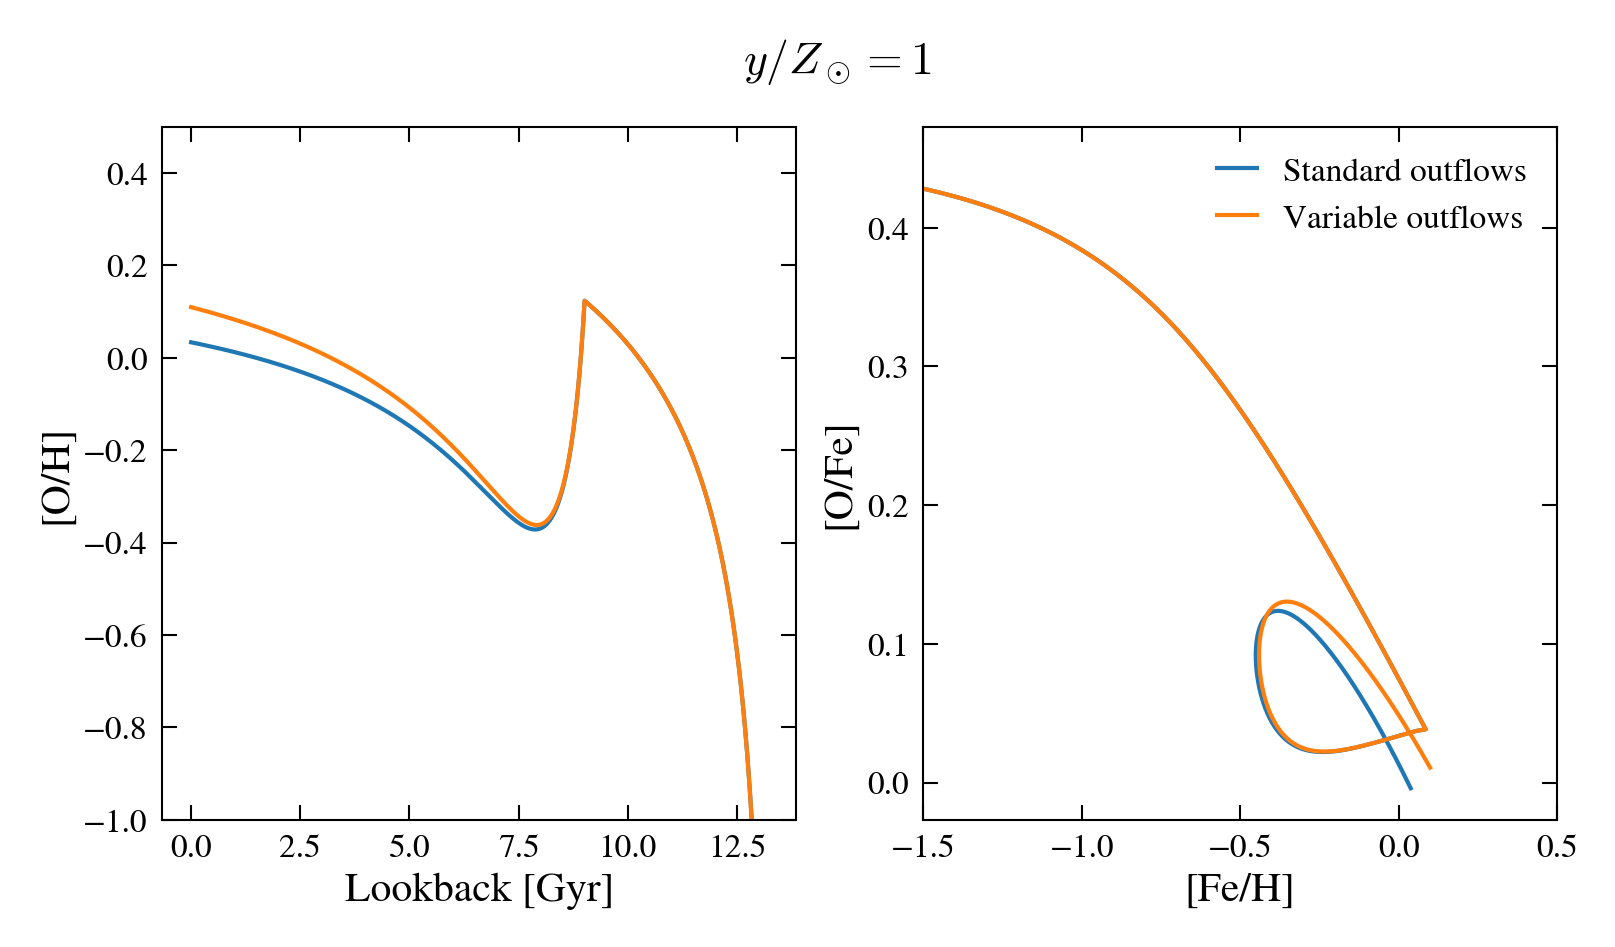

In [2]:
from multizone.src.yields import yZ1

fig, axs = plt.subplots(1, 2, figsize=(6, 3))

onezone_dir = paths.data / 'onezone' / 'variable_outflows'
if not onezone_dir.exists():
    onezone_dir.mkdir(parents=True)
onset = 4.2
ifr = twoinfall_onezone(
    RADIUS,
    mass_loading=ETA_YZ1,
    dt=DT,
    dr=ZONE_WIDTH,
    onset=onset
)
tau_star = models.twoinfall_sf_law(AREA, onset=onset)

# Standard outflow prescription
name = str(onezone_dir / 'yZ1_standard')
sz = vice.singlezone(
    name=name,
    func=ifr,
    mode='ifr',
    **ONEZONE_DEFAULTS
)
sz.tau_star = tau_star
sz.eta = ETA_YZ1
sz.run(SIMTIME, overwrite=True)
hist = vice.history(name)
axs[0].plot(hist['lookback'], hist['[o/h]'])
axs[1].plot(hist['[fe/h]'], hist['[o/fe]'], label='Standard outflows')

# Variable outflow prescription
def eta_vary_yZ1(time):
    if time < onset:
        return ETA_YZ1
    else:
        return 0.

name = str(onezone_dir / 'yZ1_vary')
sz = vice.singlezone(
    name=name,
    func=ifr,
    mode='ifr',
    **ONEZONE_DEFAULTS
)
sz.tau_star = tau_star
sz.eta = eta_vary_yZ1
sz.run(SIMTIME, overwrite=True)
hist = vice.history(name)
axs[0].plot(hist['lookback'], hist['[o/h]'])
axs[1].plot(hist['[fe/h]'], hist['[o/fe]'], label='Variable outflows')

axs[0].set_ylim((-1, 0.5))
axs[1].set_xlim((-1.5, 0.5))
axs[0].set_xlabel('Lookback [Gyr]')
axs[0].set_ylabel('[O/H]')
axs[1].set_xlabel('[Fe/H]')
axs[1].set_ylabel('[O/Fe]')
axs[1].legend()
fig.suptitle(r'$y/Z_\odot=1$')
plt.show()


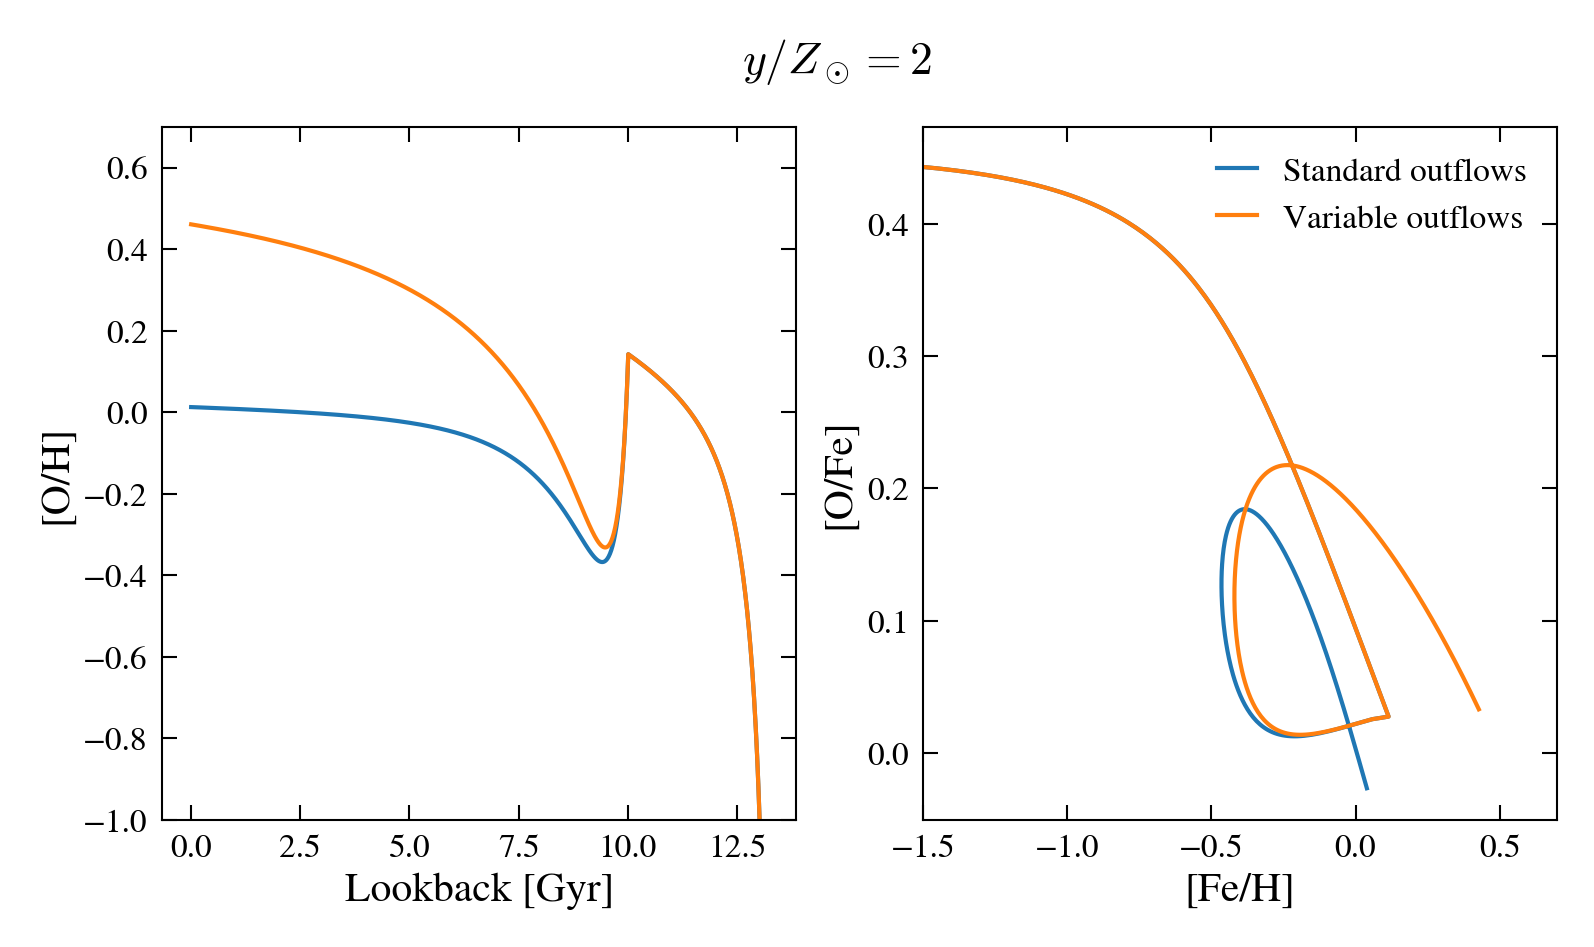

In [3]:
from multizone.src.yields import yZ2

fig, axs = plt.subplots(1, 2, figsize=(6, 3))

onezone_dir = paths.data / 'onezone' / 'variable_outflows'
if not onezone_dir.exists():
    onezone_dir.mkdir(parents=True)
onset = 3.2
ifr = twoinfall_onezone(
    RADIUS,
    mass_loading=ETA_YZ2,
    dt=DT,
    dr=ZONE_WIDTH,
    onset=onset
)
tau_star = models.twoinfall_sf_law(AREA, onset=onset)

# Standard outflow prescription
name = str(onezone_dir / 'yZ2_standard')
sz = vice.singlezone(
    name=name,
    func=ifr,
    mode='ifr',
    **ONEZONE_DEFAULTS
)
sz.tau_star = tau_star
sz.eta = ETA_YZ2
sz.run(SIMTIME, overwrite=True)
hist = vice.history(name)
axs[0].plot(hist['lookback'], hist['[o/h]'])
axs[1].plot(hist['[fe/h]'], hist['[o/fe]'], label='Standard outflows')

# Variable outflow prescription
def eta_vary_yZ2(time):
    if time < onset:
        return ETA_YZ2
    else:
        return 0.
    
name = str(onezone_dir / 'yZ2_vary')
sz = vice.singlezone(
    name=name,
    func=ifr,
    mode='ifr',
    **ONEZONE_DEFAULTS
)
sz.tau_star = tau_star
sz.eta = eta_vary_yZ2
sz.run(SIMTIME, overwrite=True)
hist = vice.history(name)
axs[0].plot(hist['lookback'], hist['[o/h]'])
axs[1].plot(hist['[fe/h]'], hist['[o/fe]'], label='Variable outflows')

axs[0].set_ylim((-1, 0.7))
axs[1].set_xlim((-1.5, 0.7))
axs[0].set_xlabel('Lookback [Gyr]')
axs[0].set_ylabel('[O/H]')
axs[1].set_xlabel('[Fe/H]')
axs[1].set_ylabel('[O/Fe]')
axs[1].legend()
fig.suptitle(r'$y/Z_\odot=2$')
plt.show()